<a href="https://colab.research.google.com/github/datvodinh10/project-DD/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
import torch

In [2]:
from src.model.trainer import Trainer

c:\Users\vodin\.conda\envs\pytorchenv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\vodin\.conda\envs\pytorchenv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## Train

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
config = {
    'transformer':{
        'embed_size': 384,      # model's hidden size
        'num_heads':6,          # number of heads in MSA
        'num_layers':2,         # number of encoder/decoder layer
        'max_len': 10_000,      # max sequence length
        'dropout':0.2,          # dropout rate
        'bias':False,           # attention bias
        'embed_type': 'learned' # {'position','learned'}

    },
    'encoder':{
        'type': 'swin_transformer', # {'resnet18','resnet50,'vgg','swin_transformer','vision_transformer'}
        
        'ViT':{
            'patch_size': 16,
        },
        
        'swin':{
            'img_size':(64,128),
            'embed_dim':48,
            'window_size':8
        },
    },
    
    'device':device,
    'lr':1e-4,
    'batch_size':1,
    'num_epochs':500,
    'preprocessing': 'none'
}

In [5]:
trainer = Trainer(config      = config,
                  IMAGE_PATH  = "C:/Users/vodin/project-DD/preprocess",
                  TARGET_PATH = "C:/Users/vodin/Downloads/train_gt.txt")

c:\Users\vodin\.conda\envs\pytorchenv\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Total parameters: {count_parameters(trainer.model)}')

Total parameters: 23384864


In [7]:
trainer.train()

| Epoch   0 / 500: [ ################### ]  100.00% | Loss: 4.1278 | ETA:     0.0s | 
| Epoch   1 / 500: [ ################--- ]   85.50% | Loss: 3.9172 | ETA:     3.8s | 

KeyboardInterrupt: 

In [ ]:
a = 10
print(f"a {a:5.2f}")

a 10.00


In [ ]:
import time

In [ ]:
a = time.perf_counter()
time.sleep(1)
print(time.perf_counter() - a)

1.0010227000000214


In [ ]:
save_dict = {
    'state_dict':trainer.model.state_dict(),
    'config':config,
    'vocab_size':trainer.vocabulary.vocab_size
}
file_path = 'model.pth'
torch.save(save_dict, file_path)

## Predict

In [ ]:
from src.utils.inference import Inference
from src.utils.transform import Transform
from PIL import Image
import os
import torch
import matplotlib.pyplot as plt

In [ ]:
infer = Inference(DATA_PATH   = 'model.pth',
                  TARGET_PATH = "C:/Users/vodin/Downloads/train_gt.txt")

In [ ]:
T = Transform('none')

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
idx = torch.randint(200,())
img = Image.open(os.path.join("C:/Users/vodin/project-DD/preprocess",os.listdir("C:/Users/vodin/project-DD/preprocess")[idx]))
infer.predict(T(img).unsqueeze(0).to(device))

'HIM'

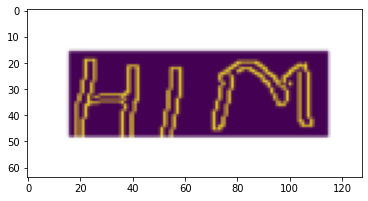

In [ ]:
plt.imshow(T(img).permute(1,2,0))

In [ ]:
import time

def custom_fit(generator, steps_per_epoch, epochs):
    for epoch in range(1, epochs + 1):
        print(f"Epoch {epoch}/{epochs}")
        print("=" * 20)
        
        for step in range(1, steps_per_epoch + 1):
            time.sleep(0.1)  # Simulating some processing time
            
            # Generate fake batch data (replace this with actual data generation)
            batch_data = (f"Batch {step}/{steps_per_epoch}",)
            
            # Update progress
            progress = (step / steps_per_epoch) * 100
            print(f"{step}/{steps_per_epoch} - {progress:.2f}% - ", end="")
            
            # Print your custom information about the current batch (replace with actual information)
            print(batch_data)
        
        print("=" * 20)
        print("Epoch completed\n")
        time.sleep(0.5)  # Simulating some processing time

# Example usage
custom_fit(generator=None, steps_per_epoch=10, epochs=5)


Epoch 1/5
1/10 - 10.00% - ('Batch 1/10',)
2/10 - 20.00% - ('Batch 2/10',)
3/10 - 30.00% - ('Batch 3/10',)
4/10 - 40.00% - ('Batch 4/10',)
5/10 - 50.00% - ('Batch 5/10',)
6/10 - 60.00% - ('Batch 6/10',)
7/10 - 70.00% - ('Batch 7/10',)
8/10 - 80.00% - ('Batch 8/10',)
9/10 - 90.00% - ('Batch 9/10',)
10/10 - 100.00% - ('Batch 10/10',)
Epoch completed

Epoch 2/5
1/10 - 10.00% - ('Batch 1/10',)
2/10 - 20.00% - ('Batch 2/10',)
3/10 - 30.00% - ('Batch 3/10',)
4/10 - 40.00% - ('Batch 4/10',)
5/10 - 50.00% - ('Batch 5/10',)
6/10 - 60.00% - ('Batch 6/10',)
7/10 - 70.00% - ('Batch 7/10',)
8/10 - 80.00% - ('Batch 8/10',)
9/10 - 90.00% - ('Batch 9/10',)
10/10 - 100.00% - ('Batch 10/10',)
Epoch completed

Epoch 3/5
1/10 - 10.00% - ('Batch 1/10',)
2/10 - 20.00% - ('Batch 2/10',)
3/10 - 30.00% - ('Batch 3/10',)
4/10 - 40.00% - ('Batch 4/10',)
5/10 - 50.00% - ('Batch 5/10',)
6/10 - 60.00% - ('Batch 6/10',)
7/10 - 70.00% - ('Batch 7/10',)
8/10 - 80.00% - ('Batch 8/10',)
9/10 - 90.00% - ('Batch 9/10',)
10